In [ ]:
!pip install --quiet --upgrade gensim
import os
os.kill(os.getpid(), 9)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 76.5 MB/s eta 0:00:00


In [1]:
import gensim
from gensim.models import Word2Vec

In [3]:
#from google.colab import files
import pandas as pd
import numpy as np

#uploaded = files.upload()

In [16]:
file_link = 'https://github.com/AI-is-out-there/data2lab/raw/refs/heads/main/%D0%BC%D0%BE%D0%B4%D1%83%D0%BB%D1%8C%202%20-%20%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%20-%20%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0.csv'
# модуль 2 - датасет - практика.csv'
data = pd.read_csv(file_link)
print(data.head)

<bound method NDFrame.head of       subject_id  Count_subj  study_id  cart_id  Healthy_Status eeg_time   \
0       19557662          27  40000017  6848296               0   8:44 AM   
1       18477137          93  40000029  6848296               0   9:54 AM   
2       16598616           3  40000035  6376932               1   9:07 AM   
3       16368287           7  40000079  6214760               1   5:14 PM   
4       18370366           2  40000084  6632385               0   1:52 PM   
...          ...         ...       ...      ...             ...       ...   
9995    19612562          29  40125255  6752764               1  11:26 AM   
9996    14816795           1  40125256  6555070               1   6:01 PM   
9997    11919067           4  40125266  6632385               0   9:58 AM   
9998    13871862           2  40125273  6848296               1   5:38 PM   
9999    14747544          12  40125285  6848296               0  11:58 PM   

       eeg_date            report_0          

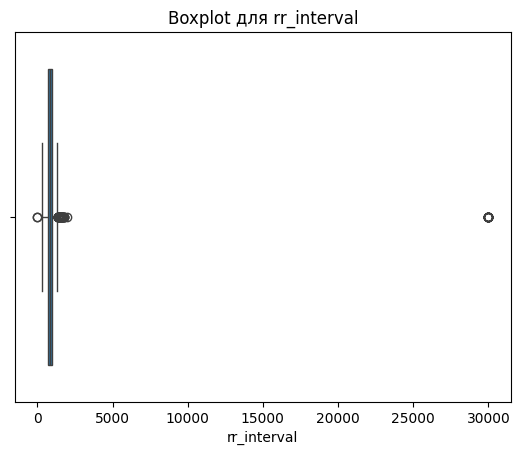

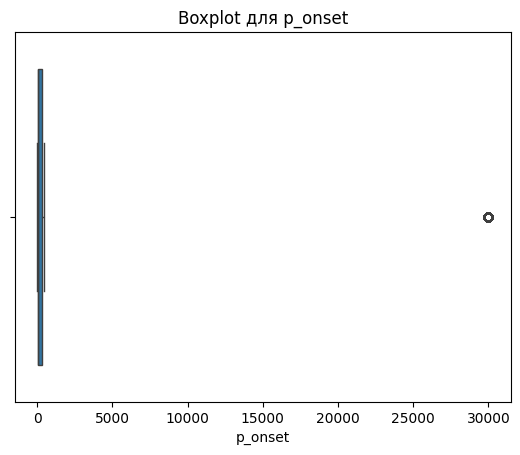

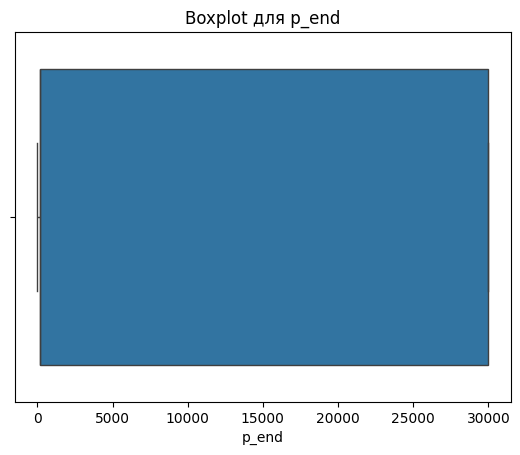

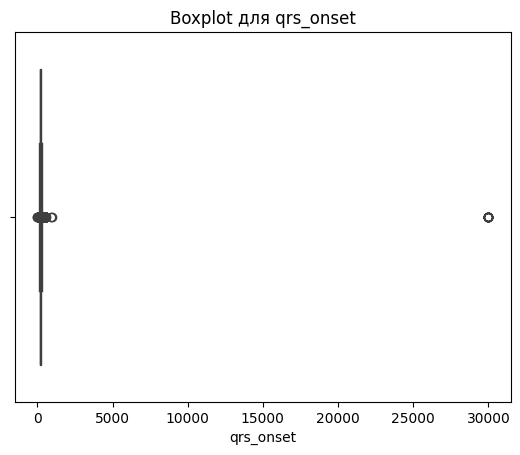

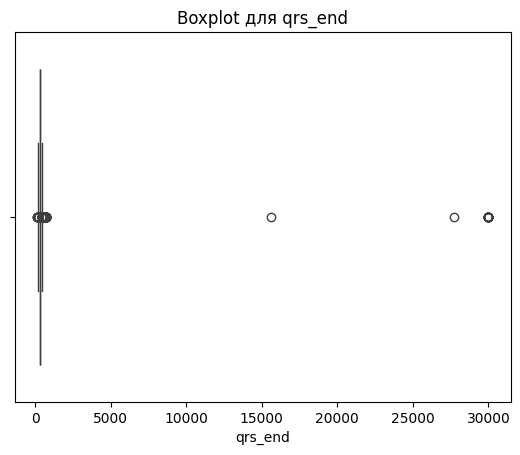

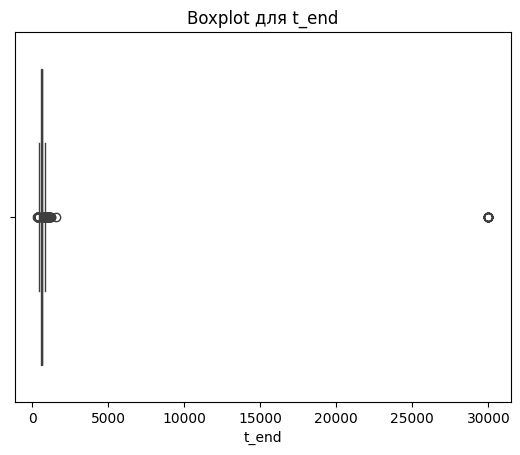

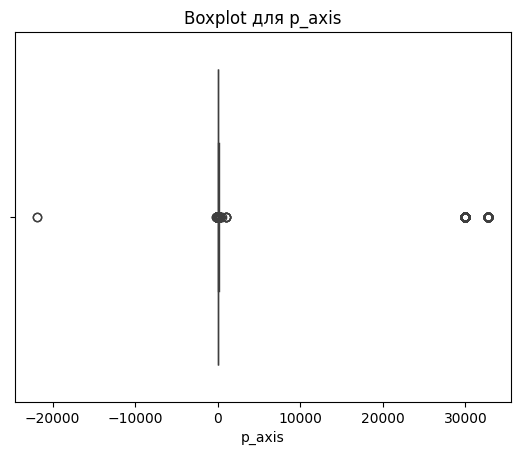

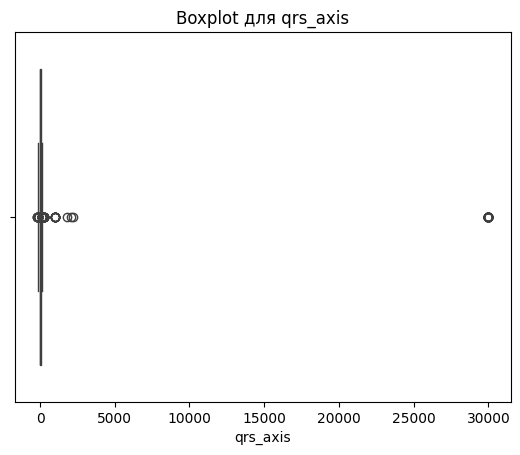

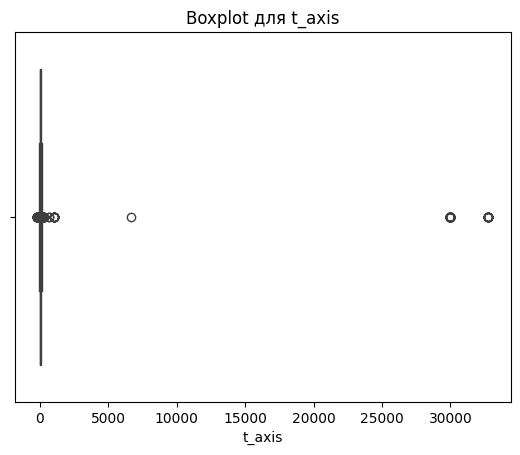

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

headers = ['rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis']
for column_name in headers:
    if column_name in data.columns:
      sns.boxplot(x=data[column_name].dropna())
      plt.title(f'Boxplot для {column_name}')
      plt.xlabel(column_name)
      plt.show()


#plt.show()

In [18]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject_id      10000 non-null  int64  
 1   Count_subj      10000 non-null  int64  
 2   study_id        10000 non-null  int64  
 3   cart_id         10000 non-null  int64  
 4   Healthy_Status  10000 non-null  int64  
 5   eeg_time        10000 non-null  object 
 6   eeg_date        10000 non-null  object 
 7   report_0        10000 non-null  object 
 8   report_1        7468 non-null   object 
 9   report_2        6468 non-null   object 
 10  report_3        4906 non-null   object 
 11  report_4        2782 non-null   object 
 12  report_5        1481 non-null   object 
 13  report_6        674 non-null    object 
 14  report_7        308 non-null    object 
 15  report_8        114 non-null    object 
 16  report_9        29 non-null     object 
 17  report_10       17 non-null     

In [19]:
for col in data.columns:
    if col.startswith('report_'):
        print(f"\nУникальные значения в столбце {col}:")
        print(data[col].unique())


Уникальные значения в столбце report_0:
['Sinus rhythm' 'Sinus tachycardia' 'Sinus rhythm with PAC(s).'
 'Sinus bradycardia' 'Sinus bradycardia with interpolated PVC(s)'
 'Sinus bradycardia.' '*** CONSIDER ACUTE ST ELEVATION MI ***'
 'Sinus rhythm with PVC(s) with borderline 1st degree A-V block'
 'Atrial fibrillation with PVC(s) or aberrant ventricular conduction.'
 'Sinus rhythm with PVC(s)' 'Sinus bradycardia with sinus arrhythmia'
 'Sinus rhythm with PVC(s).' 'Atrial fibrillation.'
 'Probable atrial fibrillation with PVC(s) or aberrant ventricular conduction.'
 'Sinus rhythm with PAC(s)' 'Sinus arrhythmia' 'Sinus rhythm with PVCs.'
 'Sinus rhythm with aberrantly conducted supraventricular complexes'
 'Sinus rhythm with borderline 1st degree A-V block'
 'Sinus bradycardia with borderline 1st degree A-V block'
 'Unknown rhythm, irregular rate' 'Sinus rhythm with PACs.'
 'Sinus rhythm with PVCs' 'Sinus bradycardia with PVC(s)'
 'Sinus bradycardia with PAC(s).' 'Sinus tachycardia with

In [20]:
print(data['qrs_onset'].unique())

[  170   162   180   504   499   198   188   196   178   172   507   182
   190   242   234   204   262   246   192   174   216   218   220   226
   176   166   200   210   208   212   206   202   232   224   184   258
   506   244   254   502   510   503   505   230   194   156   152   186
    88   160    73   144   150   511   248   250   238   252   228 29999
   222   236   240   168   135   508   509   158   260   270   118   214
   256   164   148   103   142    82   109   141   163   138   134   276
   288    76   146   136   133   264   124   110   151   131   189    79
   132   145   100   272   284   280   278   512   274   314   195    99
    86   116   268   140   154     0   266   171   130   120    78   117
   107   175   113   129   294   177   101   304   106    63   282    75
   936    98   515   112    89   125   169   115   123   104   147   296
   516   517   520   128   346   336   102   338   322   332    94    93
   513   500   126    96   137   187   181   286   

In [21]:
print(data['bandwidth'].unique())

['0.005-150 Hz' '0.0005-150 Hz' '0.05-150 Hz']


In [23]:
print(data.columns.tolist())

['subject_id', 'Count_subj', 'study_id', 'cart_id', 'Healthy_Status', 'eeg_time ', 'eeg_date ', 'report_0', 'report_1', 'report_2', 'report_3', 'report_4', 'report_5', 'report_6', 'report_7', 'report_8', 'report_9', 'report_10', 'report_11', 'report_12', 'report_13', 'report_14', 'report_15', 'report_16', 'report_17', 'bandwidth', 'filtering', 'rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis']


In [24]:
columns_to_drop = ['subject_id', 'Count_subj', 'study_id', 'cart_id','eeg_time ','eeg_date ','bandwidth','filtering']

data = data.drop(columns_to_drop, axis=1)

columns_to_filter = ['rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis']


full_df_filtered = data[(data[columns_to_filter] < 2000).all(axis=1)]


In [14]:
full_df_filtered.head()

Healthy_Status           report_0                           report_1  \
0               0       Sinus rhythm  Possible right atrial abnormality   
1               0       Sinus rhythm  Possible right atrial abnormality   
2               1  Sinus tachycardia                                NaN   
3               1       Sinus rhythm                                NaN   
4               0       Sinus rhythm                                NaN   

                     report_2        report_3 report_4 report_5 report_6  \
0                         NaN  Borderline ECG      NaN      NaN      NaN   
1                         NaN  Borderline ECG      NaN      NaN      NaN   
2  Normal ECG except for rate             NaN      NaN      NaN      NaN   
3                  Normal ECG             NaN      NaN      NaN      NaN   
4                         NaN             NaN      NaN      NaN      NaN   

  report_7 report_8  ... report_17 rr_interval p_onset  p_end qrs_onset  \
0      NaN      NaN  ...       NaN         659      40    128       170   
1      NaN      NaN  ...       NaN         722      40    124       162   
2      NaN      NaN  ...       NaN         600      40    130       162   
3      NaN      NaN  ...       NaN         659      40    146       180   
4      NaN      NaN  ...       NaN         659     368  29999       504   

  qrs_end  t_end  p_axis  qrs_axis  t_axis  
0     258    518      81        77      79  
1     246    504      77        75      70  
2     244    474      79        72      77  
3     254    538      79        66      69  
4     590    868      84        80      77  

[5 rows x 28 columns]

In [25]:
reports = [f'report_{x}' for x in range(18)]
full_df_filtered['report_0'] = full_df_filtered[reports].astype(str).agg(' '.join, axis=1)
full_df_filtered['report_0'] = full_df_filtered['report_0'].str.replace(r'\bnan\b', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()
full_df_filtered.rename(columns={'report_0': 'report'}, inplace=True)
reports_to_drop = [f'report_{x}' for x in range(1, 18)]
full_df_filtered = full_df_filtered.drop(reports_to_drop, axis=1)

<ipython-input-25-3bc3b87c5c40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df_filtered['report_0'] = full_df_filtered[reports].astype(str).agg(' '.join, axis=1)
<ipython-input-25-3bc3b87c5c40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df_filtered['report_0'] = full_df_filtered['report_0'].str.replace(r'\bnan\b', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()
<ipython-input-25-3bc3b87c5c40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [27]:
full_df_filtered.head()

Healthy_Status                                             report  \
0               0  Sinus rhythm Possible right atrial abnormality...   
1               0  Sinus rhythm Possible right atrial abnormality...   
2               1       Sinus tachycardia Normal ECG except for rate   
3               1                            Sinus rhythm Normal ECG   
6               1                            Sinus rhythm Normal ECG   

   rr_interval  p_onset  p_end  qrs_onset  qrs_end  t_end  p_axis  qrs_axis  \
0          659       40    128        170      258    518      81        77   
1          722       40    124        162      246    504      77        75   
2          600       40    130        162      244    474      79        72   
3          659       40    146        180      254    538      79        66   
6          952       40    146        198      282    598      24        80   

   t_axis  
0      79  
1      70  
2      77  
3      69  
6      20

In [28]:
# Делаем колонку с таргетами крайней справа
full_df_filtered = full_df_filtered[[col for col in full_df_filtered.columns if col != 'Healthy_Status'] + ['Healthy_Status']]

# Разбиваем столбец с текстовым отчетом на токены
words = [text.split() for text in full_df_filtered['report']]

# Обучаем модель Word2Vec
w2v_model = Word2Vec(words)

# Функция для получения среднего эмбеддинга строки
def get_sentence_embedding(sentence):
    words = sentence.split()
    word_vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)  # Усреднённый вектор
    else:
        return np.zeros(w2v_model.vector_size)  # Нулевой вектор, если слова нет в модели

# Применяем функцию ко всей колонке и переводим каждый вектор в одно число
full_df_filtered['report'] = full_df_filtered['report'].apply(lambda x: get_sentence_embedding(x).mean())

full_df_filtered.head()

report  rr_interval  p_onset  p_end  qrs_onset  qrs_end  t_end  p_axis  \
0  0.041443          659       40    128        170      258    518      81   
1  0.041443          722       40    124        162      246    504      77   
2 -0.004629          600       40    130        162      244    474      79   
3  0.004571          659       40    146        180      254    538      79   
6  0.004571          952       40    146        198      282    598      24   

   qrs_axis  t_axis  Healthy_Status  
0        77      79               0  
1        75      70               0  
2        72      77               1  
3        66      69               1  
6        80      20               1

In [29]:
table_data = full_df_filtered[['report','rr_interval','p_end','qrs_onset','qrs_end','t_end','p_axis','qrs_axis','t_axis','Healthy_Status']].copy()
table_data.head()

report  rr_interval  p_end  qrs_onset  qrs_end  t_end  p_axis  qrs_axis  \
0  0.041443          659    128        170      258    518      81        77   
1  0.041443          722    124        162      246    504      77        75   
2 -0.004629          600    130        162      244    474      79        72   
3  0.004571          659    146        180      254    538      79        66   
6  0.004571          952    146        198      282    598      24        80   

   t_axis  Healthy_Status  
0      79               0  
1      70               0  
2      77               1  
3      69               1  
6      20               1

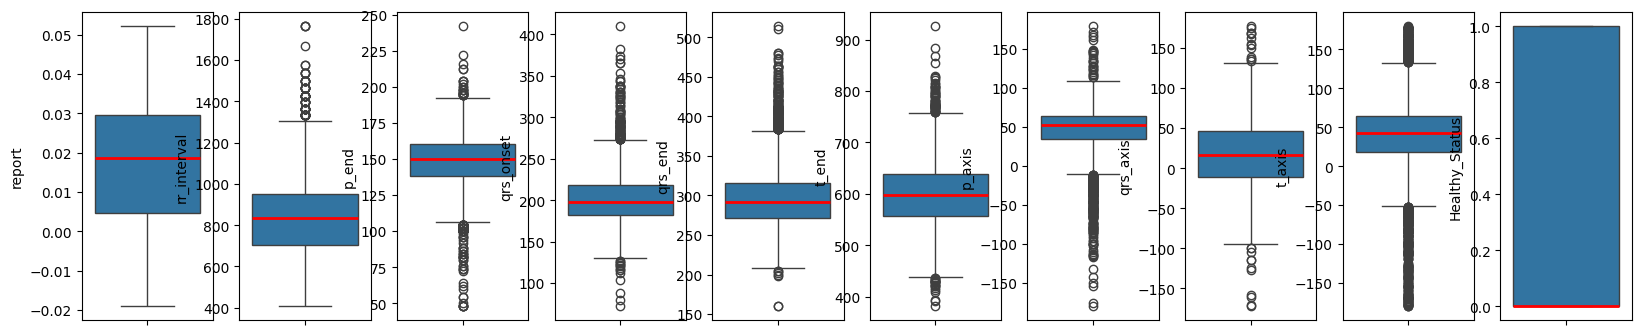

In [30]:
n = table_data.shape[1]
fig,ax = plt.subplots(1,n, figsize=(n*2,4), sharex=True)
for i in range(n):
    plt.sca(ax[i])
    col = table_data.columns[i]
    sns.boxplot(y = table_data.iloc[:,i],data=table_data,
                medianprops={"color": "r", "linewidth": 2})
    plt.tight_layout

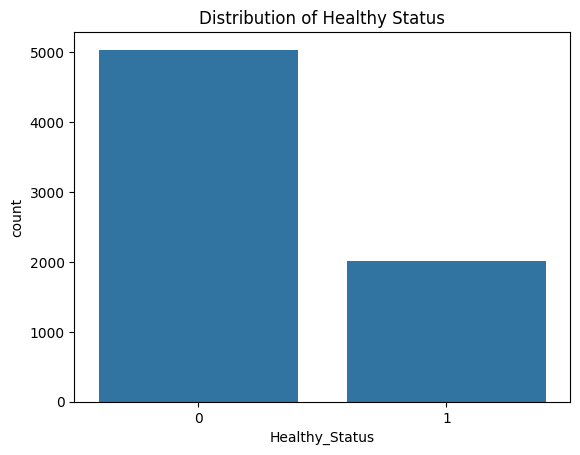

In [31]:
sns.countplot(data=table_data, x="Healthy_Status")
plt.title("Distribution of Healthy Status")
plt.show()

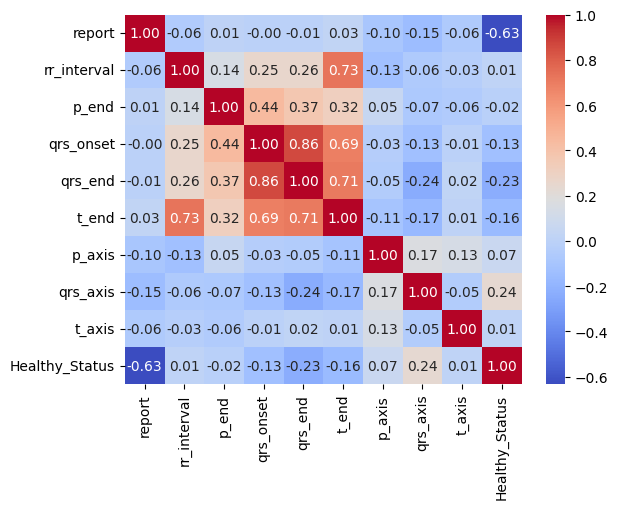

In [32]:
sns.heatmap(table_data.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()

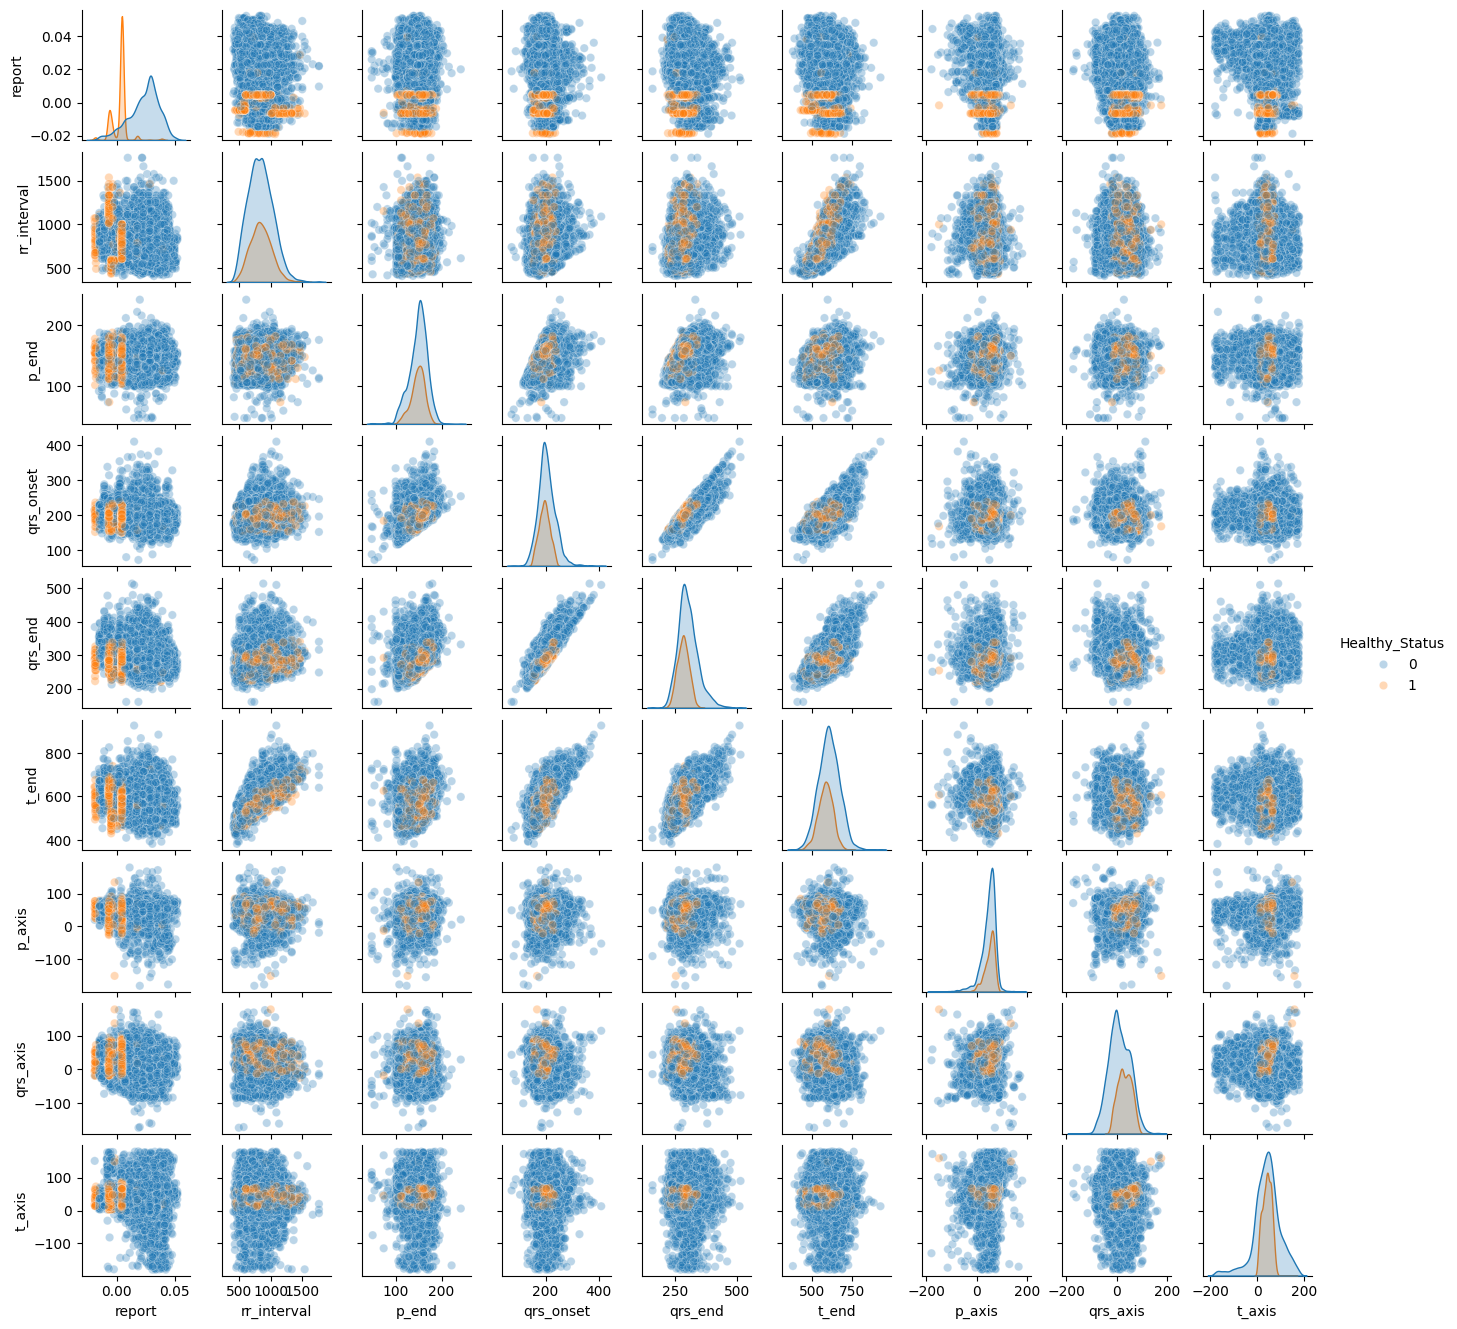

In [33]:
pairplot = sns.pairplot(table_data, hue = "Healthy_Status",
             height=1.5,
             plot_kws=dict(alpha=0.3))
pairplot.savefig("pairplot.pdf", dpi=300)

In [ ]:
from google.colab import files
files.download("pairplot.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
table_data_pca = full_df_filtered
table_data_pca = table_data_pca.drop('Healthy_Status', axis = 1)
table_data_pca.columns

Index(['report', 'rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end',
       't_end', 'p_axis', 'qrs_axis', 't_axis'],
      dtype='object')

In [ ]:
#cancer = load_breast_cancer()
# Before applying PCA, each feature should be centered (zero mean) and with unit variance
scaled_data = StandardScaler().fit(table_data_pca).transform(table_data_pca)
pca = PCA(n_components = 2).fit(scaled_data)
# PCA(copy=True, n_components=2, whiten=False)
x_pca = pca.transform(scaled_data)
print(table_data.shape, x_pca.shape)

(7046, 10) (7046, 2)


In [ ]:
percent = pca.explained_variance_ratio_
print(percent)
print(sum(percent))

[0.31170418 0.12807884]
0.4397830215800205


In [ ]:
def pca_explained(X, threshold):
  features = X.shape[1]
  for i in range(2, features):
    pca = PCA(n_components = i).fit(X)
    sum_ = pca.explained_variance_ratio_
    # add all components explained variances
    percent = sum(sum_)
    print('{} components at {:.2f}% explained variance'.format(i,percent*100))
    if percent > threshold:
      break

pca_explained(scaled_data, 0.85)

2 components at 43.98% explained variance
3 components at 55.53% explained variance
4 components at 65.94% explained variance
5 components at 75.87% explained variance
6 components at 84.01% explained variance
7 components at 91.26% explained variance


Text(0, 0.5, 'Second Principal Component')

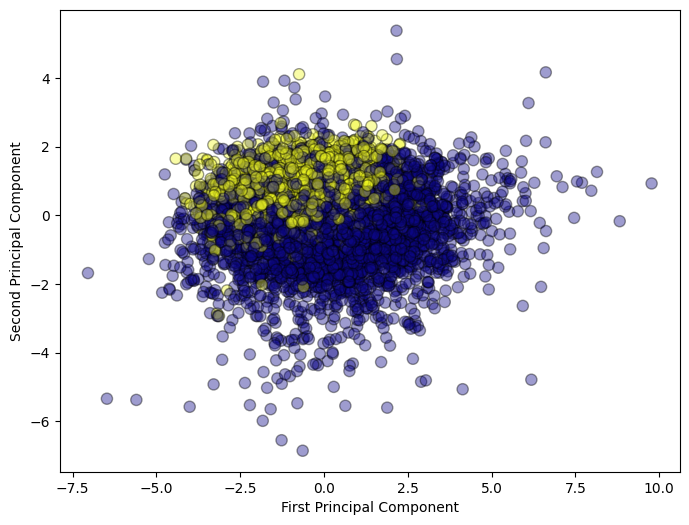

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=full_df_filtered['Healthy_Status'], cmap='plasma', alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


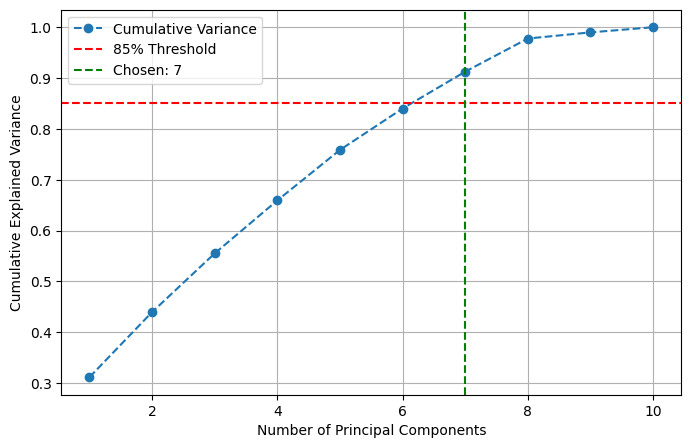

In [ ]:
# Выполняем PCA
pca = PCA().fit(scaled_data)
explained_var = np.cumsum(pca.explained_variance_ratio_)  # Накопленная дисперсия

# Число компонент, которое вы определили (7)
optimal_components = 7

# Строим график
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', linestyle='--', label="Cumulative Variance")
plt.axhline(y=0.85, color='r', linestyle='--', label="85% Threshold")  # Линия порога
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f"Chosen: {optimal_components}")  # Линия выбора

# Подписи и оформление
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)

# Отображаем график
plt.show()

In [ ]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.31170418 0.43978302 0.5552538  0.65939395 0.75872011 0.84010806
 0.91262963 0.97777966 0.98985951 1.        ]


<ipython-input-34-745a75dba18c>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0, 0, components['PCA1'][a], -components['PCA2'][a], alpha=0.5, facecolor='white', head_width=.01)
<ipython-input-34-745a75dba18c>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.annotate(i, (components['PCA1'][a]*offset, -components['PCA2'][a]*offset), color='orange')


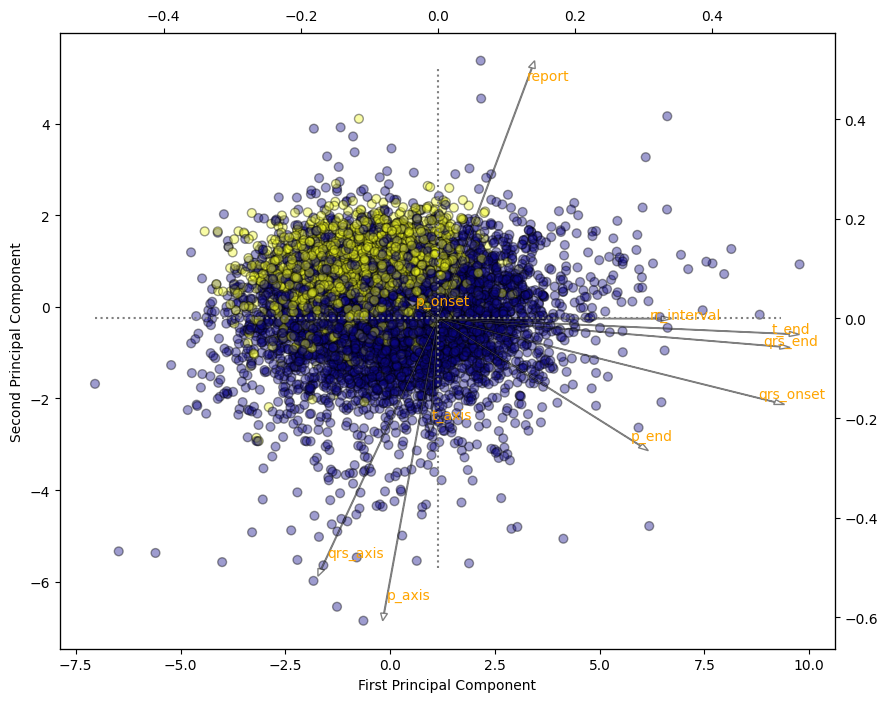

In [ ]:
scaled_data = StandardScaler().fit(table_data_pca).transform(table_data_pca)
pca = PCA(n_components = 2).fit(scaled_data)
# PCA(copy=True, n_components=2, whiten=False)
x_pca = pca.transform(scaled_data)
# put feature values into dataframe
components = pd.DataFrame(pca.components_.T, index=table_data_pca.columns, columns= ['PCA1','PCA2'])
# plot size
plt.figure(figsize=(10,8))
# main scatterplot
plt.scatter(x_pca[:,0], x_pca[:,1], c=full_df_filtered['Healthy_Status'],
            cmap='plasma', alpha=0.4, edgecolors='black', s=40);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
#plt.ylim(15,-15);
#plt.xlim(20,-20);

# individual feature values
ax2 = plt.twinx().twiny();
#ax2.set_ylim(-0.5,0.5);
#ax2.set_xlim(-0.5,0.5);

# reference lines
ax2.hlines(0,-0.5,0.5, linestyles='dotted', colors='grey')
ax2.vlines(0,-0.5,0.5, linestyles='dotted', colors='grey')

# offset for labels
offset = 0.95
# arrow & text
for a, i in enumerate(components.index):
  ax2.arrow(0, 0, components['PCA1'][a], -components['PCA2'][a], alpha=0.5, facecolor='white', head_width=.01)
  ax2.annotate(i, (components['PCA1'][a]*offset, -components['PCA2'][a]*offset), color='orange')

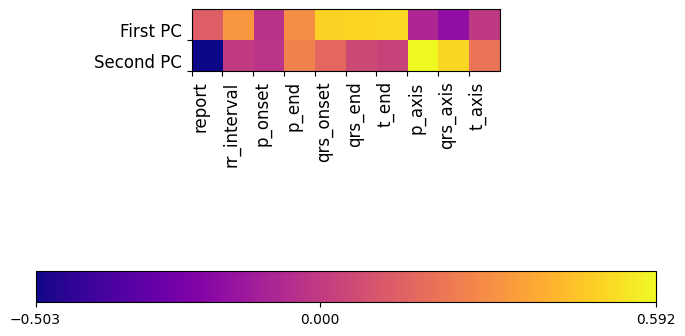

In [ ]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(table_data_pca.columns)
plt.gca().set_xticks(np.arange(-.5, len(feature_names)-1));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left',fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom',fontsize=12);
plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0,
                                              pca.components_.max()],pad=0.65);

(7046, 10) (7046, 7)


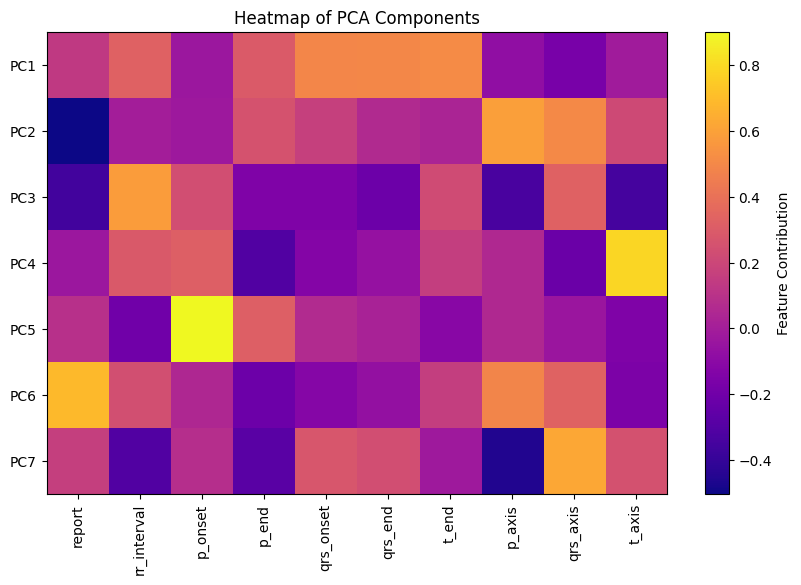

In [ ]:
scaled_data = StandardScaler().fit(table_data_pca).transform(table_data_pca)
pca = PCA(n_components = 7).fit(scaled_data)
# PCA(copy=True, n_components=2, whiten=False)
x_pca = pca.transform(scaled_data)
print(table_data.shape, x_pca.shape)
plt.figure(figsize=(10,6))
plt.imshow(pca.components_[:7, :], cmap='plasma', aspect='auto')
plt.colorbar(label="Feature Contribution")
plt.xticks(range(len(table_data_pca.columns)), table_data_pca.columns, rotation=90)
plt.yticks(range(7), [f'PC{i+1}' for i in range(7)])
plt.title('Heatmap of PCA Components')
plt.show()

Text(0, 0.5, 'Second Principal Component')

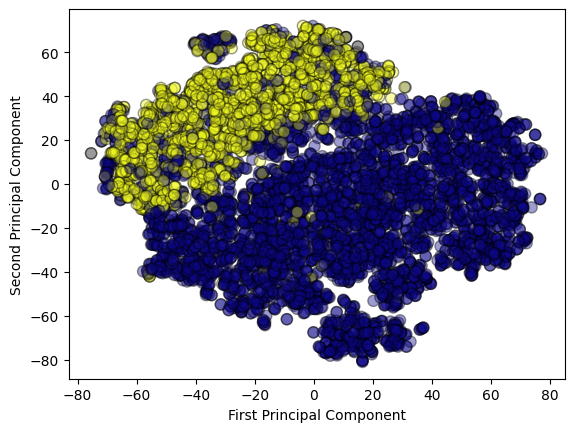

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 0)
scaled_data_mds_tsne = tsne.fit_transform(scaled_data)
plt.scatter(scaled_data_mds_tsne[:,0], scaled_data_mds_tsne[:,1], c=full_df_filtered['Healthy_Status'], cmap='plasma', alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

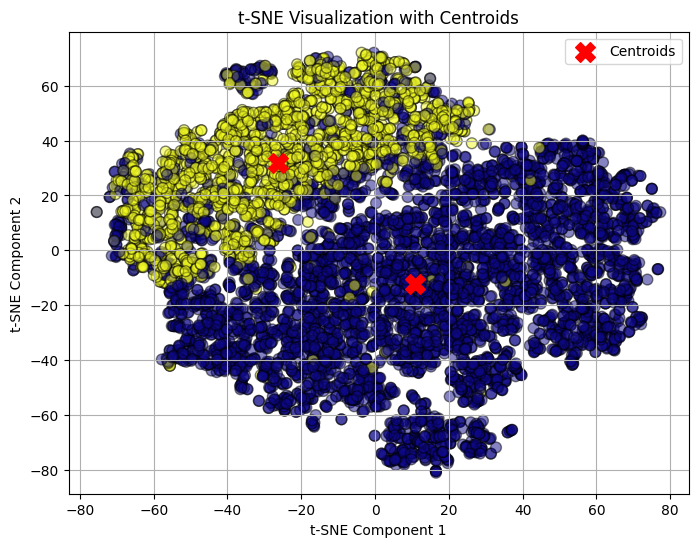

In [ ]:

unique_classes = np.unique(full_df_filtered['Healthy_Status'])
centroids = np.array([scaled_data_mds_tsne[full_df_filtered['Healthy_Status'] == cls].mean(axis=0) for cls in unique_classes])


plt.figure(figsize=(8,6))
scatter = plt.scatter(scaled_data_mds_tsne[:,0], scaled_data_mds_tsne[:,1], c=full_df_filtered['Healthy_Status'],
                       cmap='plasma', alpha=0.5, edgecolors='black', s=60)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')  # Центроиды
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization with Centroids')
plt.legend()
plt.grid(True)
plt.show()

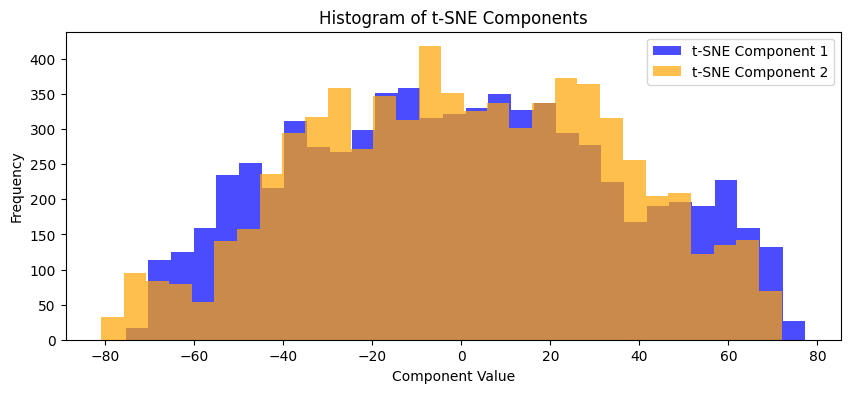

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(scaled_data_mds_tsne[:,0], bins=30, alpha=0.7, color='blue', label='t-SNE Component 1')
plt.hist(scaled_data_mds_tsne[:,1], bins=30, alpha=0.7, color='orange', label='t-SNE Component 2')
plt.xlabel('Component Value')
plt.ylabel('Frequency')
plt.title('Histogram of t-SNE Components')
plt.legend()
plt.show()

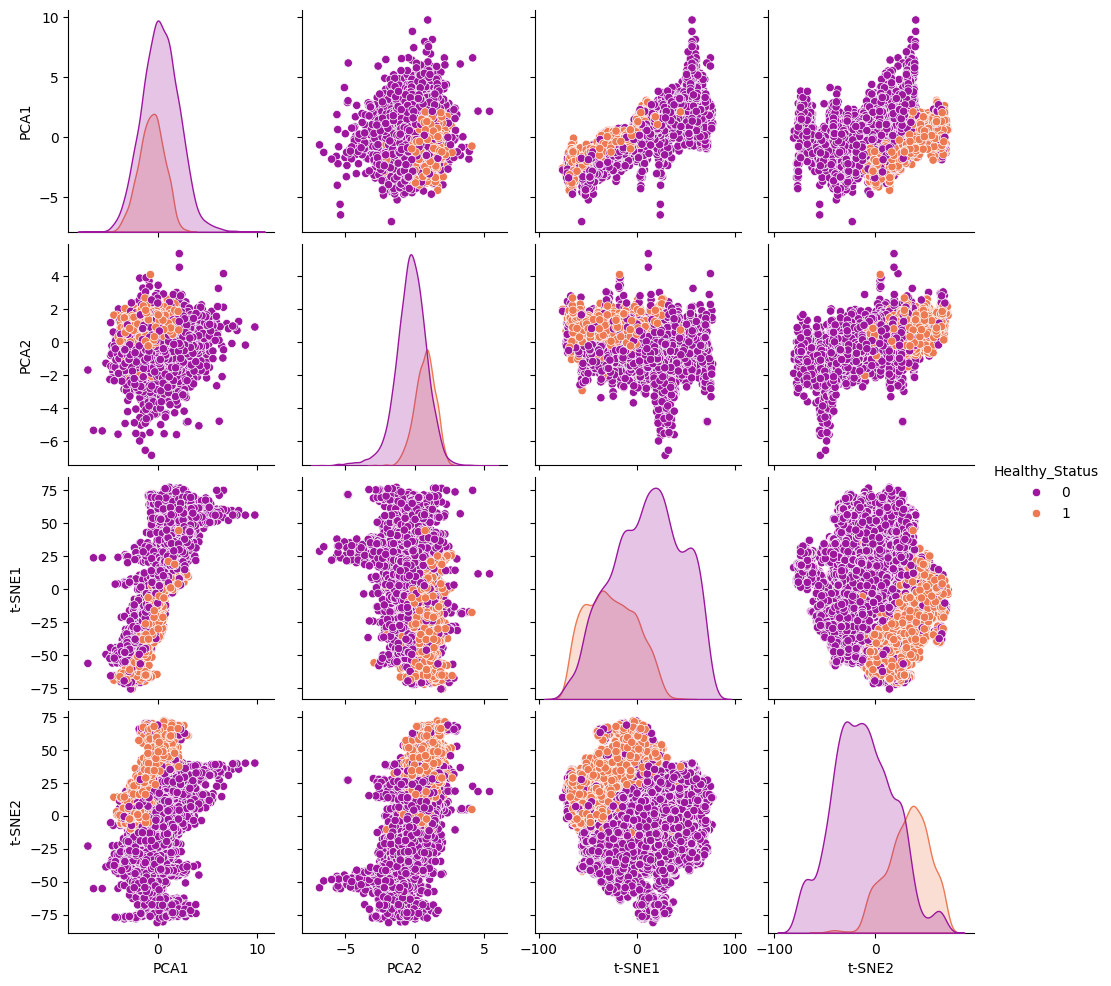

In [ ]:
import seaborn as sns
import pandas as pd

df_pca_tsne = pd.DataFrame({
    'PCA1': x_pca[:,0],
    'PCA2': x_pca[:,1],
    't-SNE1': scaled_data_mds_tsne[:,0],
    't-SNE2': scaled_data_mds_tsne[:,1],
    'Healthy_Status': full_df_filtered['Healthy_Status']
})

sns.pairplot(df_pca_tsne, hue='Healthy_Status', palette='plasma', diag_kind='kde')
plt.show()

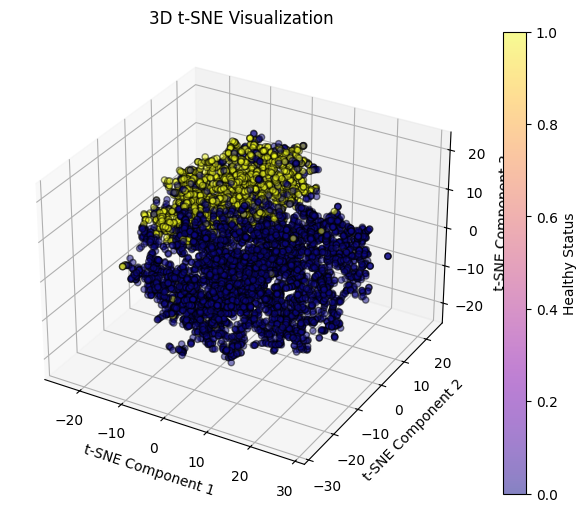

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

tsne_3d = TSNE(n_components=3, random_state=0).fit_transform(scaled_data)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(tsne_3d[:,0], tsne_3d[:,1], tsne_3d[:,2], c=full_df_filtered['Healthy_Status'], cmap='plasma', alpha=0.5, edgecolors='black')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.title('3D t-SNE Visualization')
plt.colorbar(sc, label='Healthy Status')
plt.show()